## CFD EMS Capstone: Data exploration

### Set-up

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import tarfile
import os
import requests
import dotenv
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Read csv
emsdata = pd.read_csv('CFD_NFIRS_1_1_17to_6_25_21.csv')

# Rename columns
emsdata.columns = ['Number', 
                   'Date', 
                   'Hour',
                   'PrimaryAction',
                   'ApparatusActions',
                   'ApparatusArrivalDT',
                   'ApparatusArrivalSequence',
                   'ApparatusTimeOnScene',
                   'ApparatusArrivalTime',
                   'ApparatusDispatchDT',
                   'AlarmHandlingTime',
                   'ApparatusTurnoutTime',
                   'ApparatusEnrouteArrivedTime',
                   'TotalResponseTime', 
                   'ApparatusEnrouteDT',
                   'ApparatusID',
                   'ApparatusPrimaryAction',
                   'ApparatusType',
                   'FirstApparatusID',
                   'ApparatusPersonnelName', 
                   'ApparatusPersonnelRole',
                   'ApparatusActionsList',
                   'ApparatusPersonnelHours',
                   'ApparatusDispatchToServiceTime',
                   'ApparatusNumberPeople', 
                   'ApparatusCallSignList',
                   'ReporterName',
                   'CivilianInjuries',
                   'ContentLosses',
                   'Exposure', 
                   'FireServiceInjuries',
                   'IncidentAddress', 
                   'IncidentLatitude',
                   'IncidentLongitude', 
                   'IncidentHoliday',
                   'IncidentWeekend', 
                   'IncidentCategory',
                   'IncidentType',
                   'NumberSuppressionApparatus',
                   'NumberOtherApparatus', 
                   'PropertyUse',
                   'PropertyUseCode', 
                   'Shift/Platoon',
                   'IncidentZone/DistrictNumber',
                   'FireServiceCasualty', 
                   'CivilianCasualty',
                   'PropertyPreIncidentValue', 
                   'PropertyLosses',
                   'ContentsPreIncidentValue', 
                   'IncidentTotalLosses']

# lowercase
emsdata['PrimaryAction'] = emsdata['PrimaryAction'].str.lower()

In [3]:
# Type of action
emsdata['Type'] = np.where(emsdata['PrimaryAction'].str.contains('fire alarm'),'Alarm setup', 
                    np.where(emsdata['PrimaryAction'].str.contains('fire'),'Fire',
                    np.where(emsdata['PrimaryAction'].str.contains('hazardous materials'),'HazMat',
                    np.where(emsdata['PrimaryAction'].str.contains('hazmat'),'HazMat',
                    np.where(emsdata['PrimaryAction'].str.contains('materials are non-hazardous'),'HazMat',
                    np.where(emsdata['PrimaryAction'].str.contains('smoke alarm'),'Alarm setup',
                    np.where(emsdata['PrimaryAction'].str.contains('rescue'),'Rescue',
                    np.where(emsdata['PrimaryAction'].str.contains('life support'),'Medical',
                    np.where(emsdata['PrimaryAction'].str.contains('medical'),'Medical',
                    np.where(emsdata['PrimaryAction'].str.contains('first aid'),'Medical',
                    np.where(emsdata['PrimaryAction'].str.contains('investigat'),'Investigate',
                    np.where(emsdata['PrimaryAction'].str.contains('weather'),'Weather',
                    np.where(emsdata['PrimaryAction'].str.contains('standby'),'Standby',
                    np.where(emsdata['PrimaryAction'].str.contains('control'),'Crowd/traffic control',
                    np.where(emsdata['PrimaryAction'].str.contains('equipment'),'Equipment/manpower',
                    np.where(emsdata['PrimaryAction'].str.contains('apparatus'),'Equipment/manpower',
                    np.where(emsdata['PrimaryAction'].str.contains('manpower'),'Equipment/manpower',
                    np.where(emsdata['PrimaryAction'].str.contains('lifting assistance'),'Equipment/manpower',
                    np.where(emsdata['PrimaryAction'].str.contains('cancel'),'Cancelled',
                    np.where(emsdata['PrimaryAction'].str.contains('assist'),'Assistance',
                        'other'))))))))))))))))))))

# Arrival order
emsdata['ArrivalOrder'] = pd.cut(emsdata['ApparatusArrivalSequence'], bins=[0,1,3,100], labels=['1', '2-3', '4+'])


In [4]:
# list of missing addresses
missingadd = {
    2540: '250 Bypass Charlottesville VA 22901',
    2541: '250 Bypass Charlottesville VA 22901',
    2542: '250 Bypass Charlottesville VA 22901',
    2543: '250 Bypass Charlottesville VA 22901',
    3947: '1608 Monticello Road Charlottesville VA 22902',
    6044: '1422 Forest Ridge Road Charlottesville VA 22903',
    6045: '1422 Forest Ridge Road Charlottesville VA 22903',
    6046: '1422 Forest Ridge Road Charlottesville VA 22903',
    12098: '809 Rainier Road Charlottesville VA 22903', 
    12099: '809 Rainier Road Charlottesville VA 22903', 
    12100: '809 Rainier Road Charlottesville VA 22903', 
    12101: '809 Rainier Road Charlottesville VA 22903', 
    14028: '211 Carlton Road Charlottesville VA 22902', 
    14029: '211 Carlton Road Charlottesville VA 22902', 
    14030: '211 Carlton Road Charlottesville VA 22902', 
    14031: '211 Carlton Road Charlottesville VA 22902', 
    15694: 'US-250 Charlottesville VA 22903',  
    15695: 'US-250 Charlottesville VA 22903',  
    15696: 'US-250 Charlottesville VA 22903',  
    15697: 'US-250 Charlottesville VA 22903',  
    15702: 'US-250 Charlottesville VA 22903',  
    15703: 'US-250 Charlottesville VA 22903', 
    36988: '1616 Grove Rd Charlottesville VA 22901', 
    36989: '1616 Grove Rd Charlottesville VA 22901', 
    36990: '1616 Grove Rd Charlottesville VA 22901', 
    36991: '1616 Grove Rd Charlottesville VA 22901', 
    105016: '1513 University Ave Charlottesville VA 22903', 
    105017: '1513 University Ave Charlottesville VA 22903', 
    105018: '1513 University Ave Charlottesville VA 22903', 
    105019: '1513 University Ave Charlottesville VA 22903', 
    106363: 'I64 Charlottesville VA 22903',
    106364: 'I64 Charlottesville VA 22903'
}

In [5]:
# Split out geographic info
emsdata['IncidentAddress'].update(pd.Series(missingadd))
emsdata['Zip'] = emsdata['IncidentAddress'].str.strip().str[-5:]
emsdata['State']=emsdata['IncidentAddress'].str.strip().str[-8:-6]
emsdata['Street']=emsdata.apply(lambda x: x['IncidentAddress'].rsplit(x['State'],1)[0][:-1].rsplit(' ',1)[0],axis=1)
emsdata['Town']=emsdata.apply(lambda x: x['IncidentAddress'].rsplit(x['State'],1)[0][:-1].rsplit(' ',1)[1],axis=1)
emsdata['Coordinates']=list(zip(emsdata['IncidentLatitude'],emsdata['IncidentLongitude']))

In [6]:
# Export geographic info
locationdata = emsdata[['Number','IncidentAddress','Street', 'Town', 'State', 'Zip','IncidentLatitude','IncidentLongitude','Coordinates']].drop_duplicates()
locationdata.to_csv('locationData.csv')

In [7]:
# Examine missing data
missing = emsdata.isnull().sum() * 100 / len(emsdata)
missing.sort_values(ascending=False)

# Drop columns with more than 30% data missing
colkeep = list(missing[missing<30].index)
emscl = emsdata[colkeep]

### Data

In [8]:
emscl.iloc[0]

Number                                                                2016-00006845
Date                                                                       1/1/2017
Hour                                                                             20
PrimaryAction                                                      provide manpower
ApparatusArrivalDT                                                          14:27.0
ApparatusArrivalSequence                                                          1
ApparatusArrivalTime                                                           8.87
ApparatusDispatchDT                                                12/31/2016 20:08
AlarmHandlingTime                                                              1.47
ApparatusTurnoutTime                                                            1.9
ApparatusEnrouteArrivedTime                                                    3.68
TotalResponseTime                                                           

In [9]:
emscl.sample(5)

,Number,Date,Hour,PrimaryAction,ApparatusArrivalDT,ApparatusArrivalSequence,ApparatusArrivalTime,ApparatusDispatchDT,AlarmHandlingTime,ApparatusTurnoutTime,...,IncidentZone/DistrictNumber,FireServiceCasualty,CivilianCasualty,Type,ArrivalOrder,Zip,State,Street,Town,Coordinates
71832,2019-00011045,11/27/2019,23,investigate,53:10.0,1,5.55,11/27/2019 23:46,1.62,2.67,...,Planning Zone 7,0,0,Investigate,1,22903,VA,1514 TRAILRIDGE,Charlottesville,"(38.023173, -78.503255)"
29609,2018-00003037,3/31/2018,11,standby,57:16.0,2,21.73,3/31/2018 11:55,1.03,0.03,...,Planning Zone 1,0,0,Standby,2-3,22901,VA,1025 ST CHARLES City of,Charlottesville,"(38.043266, -78.462525)"
31965,2018-00004380,5/10/2018,19,investigate,13:43.0,1,6.98,5/10/2018 19:08,0.87,1.00,...,N-6,0,0,Investigate,1,22903,VA,80 MONROE HILL,Charlottesville,"(38.034439, -78.508039)"
25060,2018-00000559,1/15/2018,17,provide basic life support (bls),50:32.0,2,45.00,1/15/2018 17:47,0.43,1.27,...,Planning Zone 5,0,0,Medical,2-3,22902,VA,112 West MARKET,Charlottesville,"(38.031573, -78.481473)"
63657,2019-00007295,8/15/2019,22,provide basic life support (bls),03:59.0,2,26.92,8/15/2019 22:58,1.73,1.52,...,N-6,0,0,Medical,2-3,22903,VA,1321 West MAIN,Charlottesville,"(38.033563, -78.498876)"


In [10]:
emscl.describe()

,Hour,ApparatusArrivalSequence,ApparatusArrivalTime,AlarmHandlingTime,ApparatusTurnoutTime,ApparatusEnrouteArrivedTime,TotalResponseTime,ApparatusDispatchToServiceTime,ApparatusNumberPeople,CivilianInjuries,Exposure,FireServiceInjuries,IncidentLatitude,IncidentLongitude,IncidentHoliday,IncidentWeekend,NumberSuppressionApparatus,NumberOtherApparatus,FireServiceCasualty,CivilianCasualty
count,107728.000000,107728.000000,105261.000000,107728.000000,107728.000000,107728.000000,107728.000000,105409.000000,107728.000000,107728.000000,107728.000000,107728.000000,106917.000000,106917.000000,107728.0,107728.000000,107473.000000,107473.000000,107728.000000,107728.000000
mean,12.957699,1.590905,20.808174,1.527179,1.399714,3.842375,6.769267,26.005733,2.714067,0.003258,0.000650,0.001559,38.033768,-78.490860,0.0,0.251309,1.854940,0.025448,0.001559,0.003954
std,6.100393,1.015250,31.791179,1.067208,0.821758,2.237546,2.591829,31.985811,0.695631,0.064044,0.034732,0.044751,0.013188,0.017102,0.0,0.433768,1.584521,0.177640,0.044751,0.069230
min,0.000000,1.000000,0.020000,0.020000,0.020000,0.020000,0.270000,0.070000,0.000000,0.000000,0.000000,0.000000,37.815665,-78.840976,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,6.280000,0.880000,0.930000,2.500000,5.150000,11.330000,3.000000,0.000000,0.000000,0.000000,38.025117,-78.500682,0.0,0.000000,1.000000,0.000000,0.000000,0.000000
50%,13.000000,1.000000,12.280000,1.230000,1.380000,3.450000,6.350000,17.450000,3.000000,0.000000,0.000000,0.000000,38.031460,-78.491949,0.0,0.000000,1.000000,0.000000,0.000000,0.000000
75%,18.000000,2.000000,27.550000,1.820000,1.830000,4.720000,7.900000,32.750000,3.000000,0.000000,0.000000,0.000000,38.039245,-78.480493,0.0,1.000000,2.000000,0.000000,0.000000,0.000000
max,23.000000,17.000000,2578.500000,10.000000,9.920000,30.120000,36.260000,2584.080000,7.000000,3.000000,3.000000,2.000000,38.197998,-78.334603,0.0,1.000000,13.000000,3.000000,2.000000,3.000000


In [11]:
profile = ProfileReport(emscl, 
                        title='Pandas Profiling Report',
                        html={'style':{'full_width':True}},
                        minimal=True)

profile.to_notebook_iframe()

C:\Users\darak\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/55 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Analysis

In [12]:
emscl.groupby(['Type']).agg(Count=('ApparatusArrivalSequence','count')) \
                        .sort_values(by='Count', ascending=False) \
                        .style.background_gradient()

,Count
Type,
Investigate,43834
Medical,31952
Equipment/manpower,10043
Standby,5286
Assistance,4207
other,4146
Fire,3703
Cancelled,1713
Alarm setup,1095


In [13]:
# Group by arrival times
arrivalTimesType = emscl.groupby(['Type','ArrivalOrder']).agg(AvgArrival=('ApparatusArrivalTime','mean'))

# Pivot table
arrivalTimesType.pivot_table(index=['Type'],
                    columns='ArrivalOrder',
                    values='AvgArrival') \
            .sort_values('1') \
            .style.background_gradient()

ArrivalOrder,1,2-3,4+
Type,,,
Standby,11.807411,27.773638,113.694333
Alarm setup,14.210739,26.216196,119.417083
Investigate,14.336007,12.654723,14.882899
Assistance,14.441606,29.783769,22.351364
Cancelled,15.482730,16.208757,21.880000
Rescue,16.327799,30.677436,41.581951
Equipment/manpower,16.618244,29.325323,25.874390
Crowd/traffic control,23.312526,24.563069,36.273000
other,25.230939,26.738526,19.282500


In [14]:
# Group by arrival times
arrivalTimesZone = emscl.groupby(['IncidentZone/DistrictNumber','ArrivalOrder']).agg(AvgArrival=('ApparatusArrivalTime','mean'))

# Pivot table
arrivalTimesZone.pivot_table(index=['IncidentZone/DistrictNumber'],
                    columns='ArrivalOrder',
                    values='AvgArrival') \
            .sort_values('1') \
            .style.background_gradient()

ArrivalOrder,1,2-3,4+
IncidentZone/DistrictNumber,,,
Woolen Mills,10.163636,14.184375,13.768571
HOLL,10.200000,nan,nan
Ridge Street,13.011341,14.727619,6.412000
Starr Hill,13.425128,15.748750,nan
Barracks Road,13.995143,29.610000,40.520000
Lewis Mtn,15.333028,17.828686,17.187143
Venable,15.447899,13.560435,7.470000
10th & Page,16.020185,9.737273,19.700000
North Downtown,16.234109,17.012024,18.235000


In [15]:
# Group by arrival times
arrivalTimesZip = emscl.groupby(['Zip','ArrivalOrder']).agg(AvgArrival=('ApparatusArrivalTime','mean'))

# Pivot table
arrivalTimesZip.pivot_table(index=['Zip'],
                    columns='ArrivalOrder',
                    values='AvgArrival') \
            .sort_values('1') \
            .style.background_gradient()

ArrivalOrder,1,2-3,4+
Zip,,,
22959,4.480000,nan,nan
22908,11.309709,9.280322,9.389067
22943,14.580000,14.580000,nan
22904,17.701032,15.063119,17.095055
22902,18.702217,25.257778,30.563657
23434,18.880000,46.250000,23.295000
22903,19.221207,20.827920,30.716037
22901,21.212228,28.074446,28.226537
22911,22.869311,36.430980,35.528333


In [16]:
emscl.groupby(['Zip']).agg(Count=('ApparatusArrivalSequence','count'),
                           AvgArrival=('ApparatusArrivalTime','mean')) \
                        .sort_values(by='Count', ascending=True) \
                        .style.background_gradient(subset='AvgArrival')

,Count,AvgArrival
Zip,,
22937,1,77.420000
22943,3,14.580000
22959,3,4.480000
24590,3,119.880000
22936,6,123.240000
22947,7,51.411429
22920,9,46.426667
23434,9,26.924444
22932,18,58.549444


### Census data merge

In [17]:
# load key for API
dotenv.load_dotenv()
key = os.getenv('census_key')

### Get block codes from geocoordinates

In [18]:
# API for getting blocks from geocode
# **Be careful running this, it can take a while**

# Specify call and parameters
search_url = 'https://geo.fcc.gov/api/census/area?'

# get coordinates for lookup
coord = emscl[~((emscl['IncidentLatitude'].isna())|emscl['IncidentLongitude'].isna())]['Coordinates'].drop_duplicates()

# fetch data and save as json
blockmap = [requests.get(search_url,params={'lat': la, 'lon': lo}) \
     .json()['results'][0]['block_fips'] \
     for la, lo in coord]

In [19]:
# store block level data in dataframe
blocks = pd.DataFrame({
    'Coordinates':coord,
    'BlockGroup':blockmap
})

In [20]:
# merge block data to EMS
emsdata_bg = emscl.merge(blocks, left_on='Coordinates', right_on='Coordinates')
emsdata_bg['BlockGroup12'] = emsdata_bg['BlockGroup'].str[:12]
emsdata_bg.to_csv('emsmerged.csv')

In [21]:
# import ems data merged with block data
emsdata_merged = pd.read_csv('emsmerged.csv')

### Get census data for blockcodes

In [22]:
# get unique blocks
emsdata_merged['BlockGroup12'] = emsdata_merged['BlockGroup'].astype(str).str[:12]
blockUnique = emsdata_merged['BlockGroup12'].drop_duplicates()

In [23]:
# API for getting census-level data
from census import Census

c = Census(key)

# Median Household Income
blockIncome = [c.acs5.get(('NAME', 'B19013_001E'),
          {'for': 'block group:{}'.format(b[11:]),
          'in':'state:{} county:{} tract:{}'.format(b[0:2], 
                                                    b[2:5], 
                                                    b[5:11])})[0]['B19013_001E']
    for b in blockUnique]

# Total Population
blockPop = [c.acs5.get(('NAME', 'B01003_001E'),
          {'for': 'block group:{}'.format(b[11:]),
          'in':'state:{} county:{} tract:{}'.format(b[0:2], 
                                                    b[2:5], 
                                                    b[5:11])})[0]['B01003_001E']
    for b in blockUnique]

# Total Population - White alone or in combination with other race
blockRace = [c.acs5.get(('NAME', 'B02008_001E'),
          {'for': 'block group:{}'.format(b[11:]),
          'in':'state:{} county:{} tract:{}'.format(b[0:2], 
                                                    b[2:5], 
                                                    b[5:11])})[0]['B02008_001E']
    for b in blockUnique]

# Median year structure built
blockYear = [c.acs5.get(('NAME', 'B25035_001E'),
          {'for': 'block group:{}'.format(b[11:]),
          'in':'state:{} county:{} tract:{}'.format(b[0:2], 
                                                    b[2:5], 
                                                    b[5:11])})[0]['B25035_001E']
    for b in blockUnique]

# Median gross rent
blockRent = [c.acs5.get(('NAME', 'B25064_001E'),
          {'for': 'block group:{}'.format(b[11:]),
          'in':'state:{} county:{} tract:{}'.format(b[0:2], 
                                                    b[2:5], 
                                                    b[5:11])})[0]['B25064_001E']
    for b in blockUnique]

In [24]:
censusBlock = pd.DataFrame({
    'Block': blockUnique,
    'MedIncome': blockIncome,
    'TotalPopulation': blockPop,
    'WhitePopulation': blockRace,
    'MedYearBuilt': blockYear,
    'MedRent': blockRent
})

censusBlock['PercentWhite'] = censusBlock.WhitePopulation/censusBlock.TotalPopulation
censusBlock

,Block,MedIncome,TotalPopulation,WhitePopulation,MedYearBuilt,MedRent,PercentWhite
0,515400005023,98967.0,1181.0,1090.0,1964.0,1325.0,0.922947
4,515400004012,61932.0,2293.0,1280.0,1973.0,647.0,0.558221
8,515400002022,12000.0,1966.0,1710.0,1989.0,1313.0,0.869786
11,515400008004,51250.0,1964.0,1540.0,1972.0,994.0,0.784114
16,515400004023,36670.0,1523.0,1032.0,1994.0,977.0,0.677610
...,...,...,...,...,...,...,...
90404,510030111003,-666666666.0,698.0,627.0,1994.0,685.0,0.898281
93316,510030102012,88672.0,1759.0,1610.0,1986.0,1091.0,0.915293
93374,510030105001,-666666666.0,1075.0,1045.0,1977.0,1576.0,0.972093
95658,510030111004,99333.0,2602.0,2369.0,2003.0,1411.0,0.910453


In [25]:
# merge block data to EMS
emsCensus = emsdata_merged.merge(censusBlock, left_on='BlockGroup12', right_on='Block')
emsCensus.to_csv('emsMergedIncome.csv')

In [26]:
emsCensus = pd.read_csv('emsMergedIncome.csv')

In [29]:
# ApparatusArrivalTime + ApparatusTurnoutTime + ApparatusEnrouteArrivedTime = ApparatusDispatchToServiceTime
colkeep = ['Number',
           'ApparatusArrivalSequence',
           'ApparatusDispatchToServiceTime',
           'TotalResponseTime',
           'IncidentCategory',
           'Type',
           'ArrivalOrder',
           'Block',
           'MedIncome',
           'TotalPopulation',
           'WhitePopulation',
           'MedYearBuilt',
           'MedRent',
           'PercentWhite']

emsBlock = emsCensus[colkeep].groupby(['Block', 'Type', 'IncidentCategory', 'ArrivalOrder', 
                            'ApparatusArrivalSequence']).agg({
    'TotalPopulation': 'mean',
    'WhitePopulation': 'mean',
    'MedYearBuilt': 'mean',
    'MedRent': 'mean',
    'PercentWhite': 'mean',
    'MedIncome': 'mean',
    'Number': 'count',
    'TotalResponseTime': 'median',
    'ApparatusDispatchToServiceTime': 'median'
}).reset_index()

<AxesSubplot:>

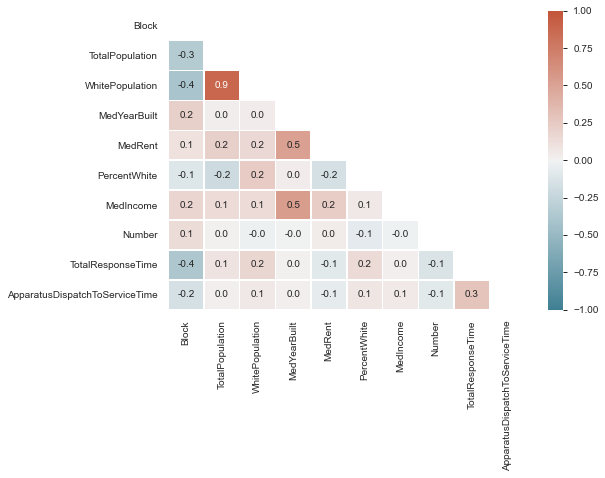

In [30]:
emsBlock1 = emsBlock[emsBlock['ArrivalOrder']=='1'].drop(['ArrivalOrder','ApparatusArrivalSequence'], axis=1)
emsBlockCorr = emsBlock1.corr()

sns.set_style('white')
clr = sns.diverging_palette(220, 20, as_cmap=True)
mask = np.triu(np.ones_like(emsBlockCorr, dtype=bool))

sns.heatmap(emsBlockCorr, vmin=-1, vmax=1, center=0, annot=True, fmt='.1f', linewidths=0.5, cmap=clr, mask=mask)

In [31]:
emsBlock1[(emsBlock1['MedIncome']>0)&(emsBlock1['ApparatusDispatchToServiceTime']<150)].head()

,Block,Type,IncidentCategory,TotalPopulation,WhitePopulation,MedYearBuilt,MedRent,PercentWhite,MedIncome,Number,TotalResponseTime,ApparatusDispatchToServiceTime
0,510030101001,Investigate,4 - Hazardous Condition (No Fire),2289.0,2249.0,1985.0,1045.0,0.982525,98486.0,2,31.68,54.15
2,510030102011,Standby,6 - Good Intent Call,2978.0,2436.0,1990.0,1130.0,0.817999,71808.0,3,24.55,39.65
3,510030102012,Standby,4 - Hazardous Condition (No Fire),1759.0,1610.0,1986.0,1091.0,0.915293,88672.0,3,18.10,25.30
4,510030102021,Cancelled,6 - Good Intent Call,1396.0,1286.0,1981.0,1163.0,0.921203,133125.0,1,14.30,59.08
5,510030102021,HazMat,4 - Hazardous Condition (No Fire),1396.0,1286.0,1981.0,1163.0,0.921203,133125.0,2,20.57,88.20


### Analysis of merged data

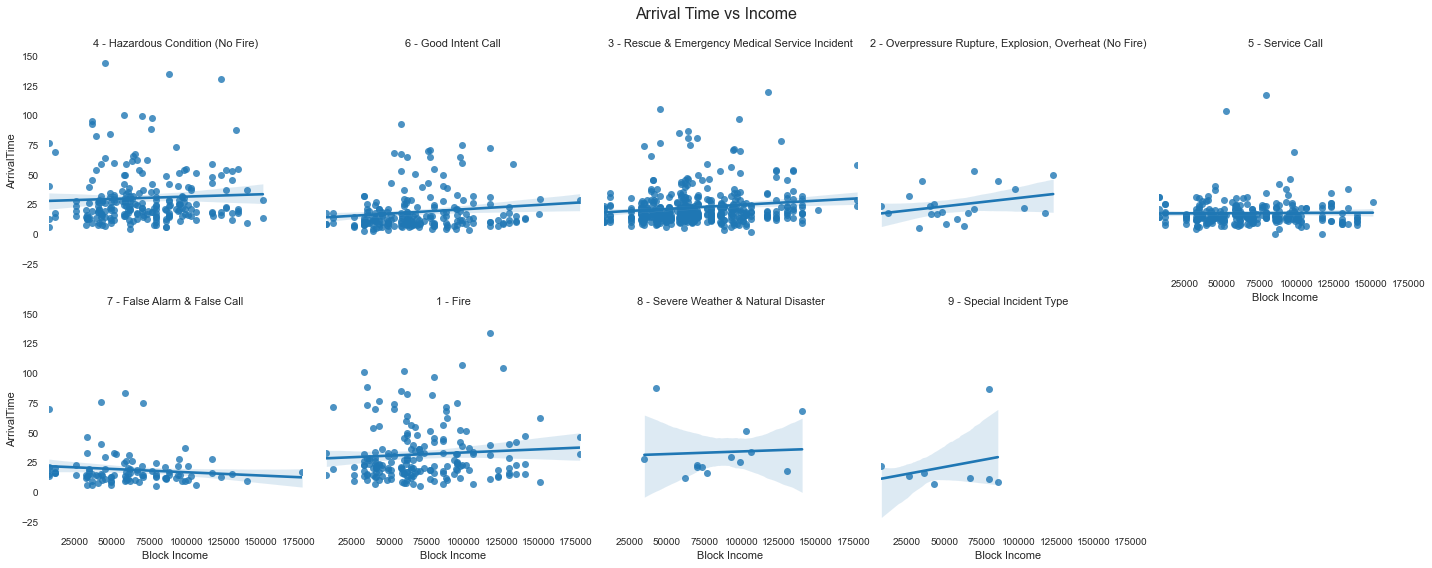

In [32]:
ems_scatter = emsBlock1[(emsBlock1['MedIncome']>0)&(emsBlock1['ApparatusDispatchToServiceTime']<150)][['IncidentCategory', 'MedIncome', 'ApparatusDispatchToServiceTime']]

# plot features
g = sns.FacetGrid(ems_scatter, col = 'IncidentCategory', col_wrap=5, height=4, aspect=1)
g.map(sns.regplot, 'MedIncome', 'ApparatusDispatchToServiceTime')
g.set_titles('{col_name}')
g.set_axis_labels('Block Income', 'ArrivalTime')
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Arrival Time vs Income', fontsize=16)
plt.show()

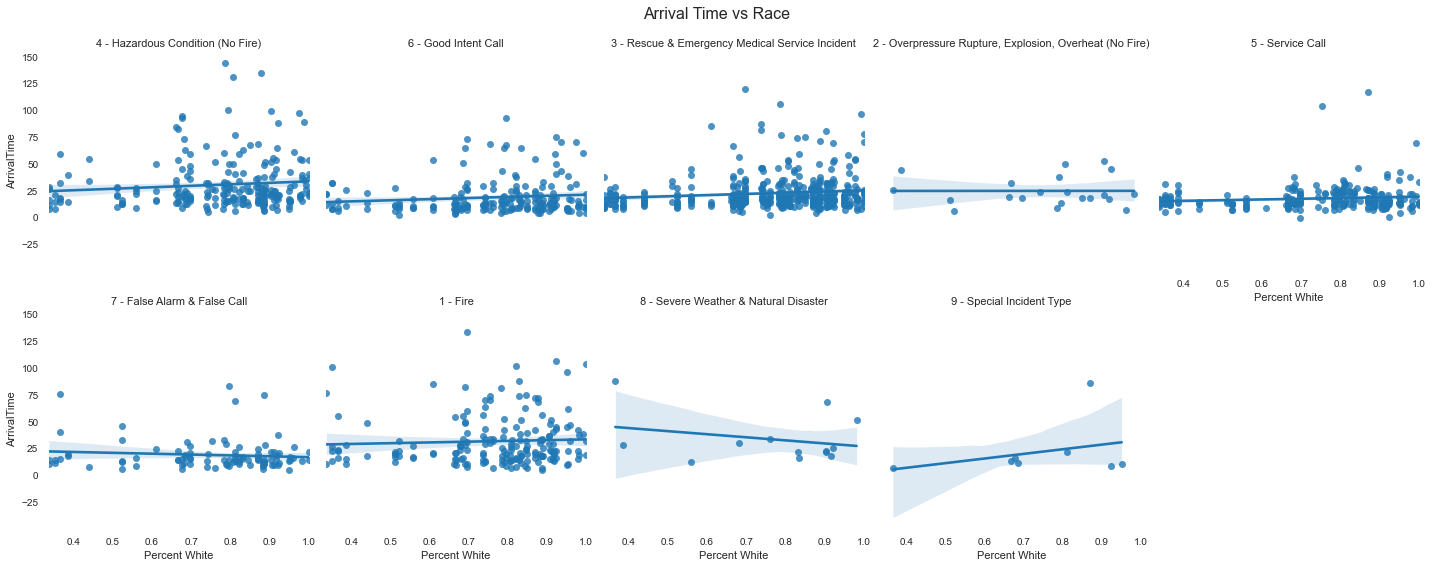

In [33]:
ems_scatter = emsBlock1[(emsBlock1['MedIncome']>0)&(emsBlock1['ApparatusDispatchToServiceTime']<150)][['IncidentCategory', 'PercentWhite', 'ApparatusDispatchToServiceTime']]

# plot features
g = sns.FacetGrid(ems_scatter, col = 'IncidentCategory', col_wrap=5, height=4, aspect=1)
g.map(sns.regplot, 'PercentWhite', 'ApparatusDispatchToServiceTime')
g.set_titles('{col_name}')
g.set_axis_labels('Percent White', 'ArrivalTime')
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Arrival Time vs Race', fontsize=16)
plt.show()

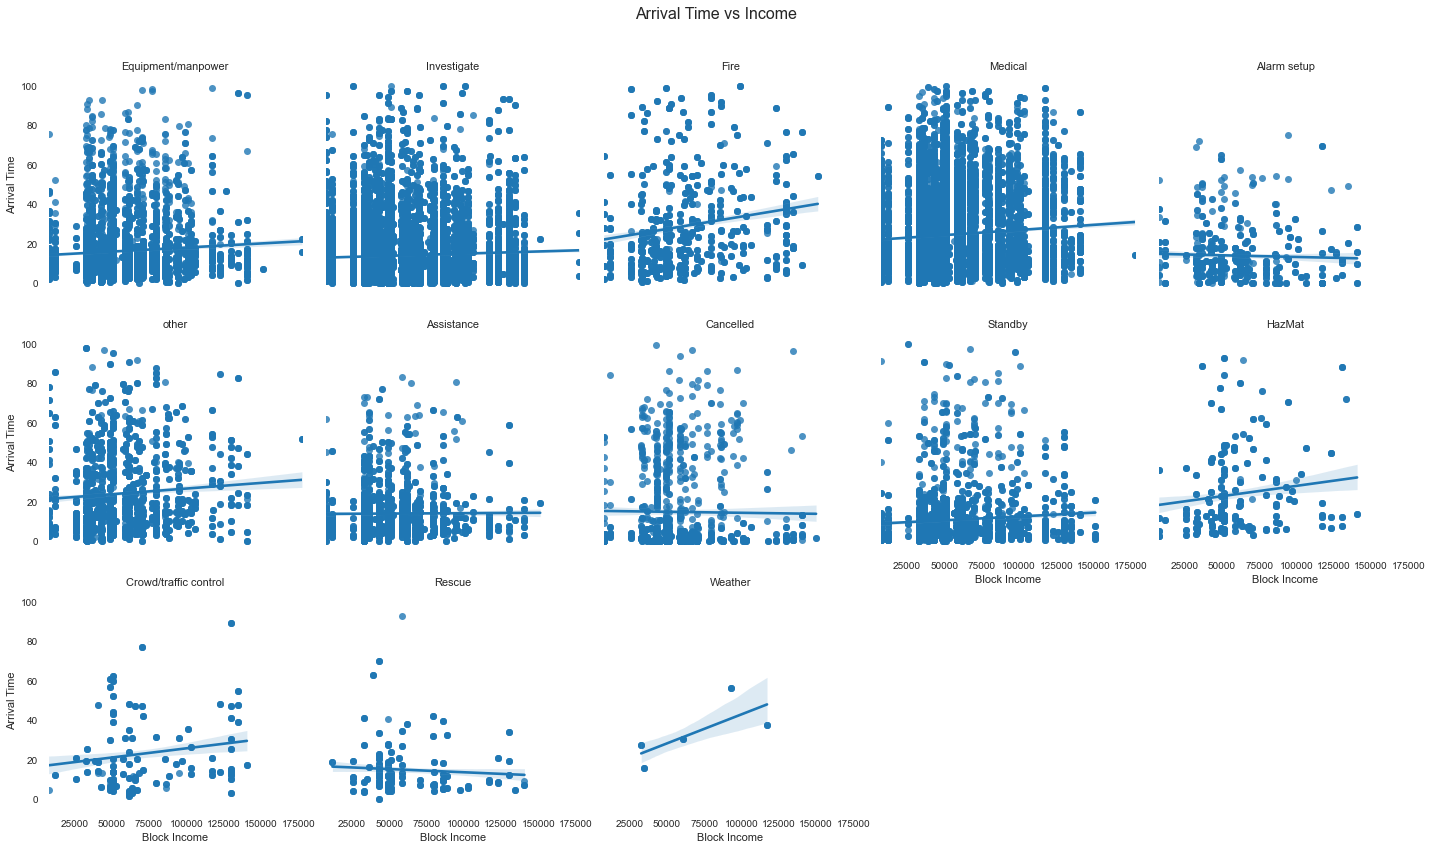

In [34]:
ems_scatter = emsCensus[(emsCensus['ArrivalOrder']=='1')&(emsCensus['ApparatusArrivalTime']<100)&(emsCensus['MedIncome']>0)][['Type', 'MedIncome', 'ApparatusArrivalTime']]

# plot features
g = sns.FacetGrid(ems_scatter, col = 'Type', col_wrap=5, height=4, aspect=1)
g.map(sns.regplot, 'MedIncome', 'ApparatusArrivalTime')
g.set_titles('{col_name}')
g.set_axis_labels('Block Income', 'Arrival Time')
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Arrival Time vs Income', fontsize=16)
plt.show()